In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import coco
import utils
import model as modellib
import visualize
from model import log

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "mylogs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco_humanpose.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
#COCO_DIR = "D:/Github/FastMaskRCNN/data/coco"  # TODO: enter value here
#IMAGE_DIR = os.path.join(ROOT_DIR, "images")
COCO_DIR = "E:/DSLR/01_Privat/2020/Hochzeit/Daniel/Fotos_Reportage"  # TODO: enter value here
IMAGE_DIR = COCO_DIR

In [2]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    KEYPOINT_MASK_POOL_SIZE = 7

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights

model_path = os.path.join(ROOT_DIR, "mask_rcnn_coco_humanpose.h5")
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
rpn_pois:  Tensor("ROI/packed_2:0", shape=(1, 1000, 4), dtype=float32)
Tensor("mrcnn_class/Reshape_1:0", shape=(1, 1000, 2), dtype=float32)
Tensor("mrcnn_bbox/Reshape:0", shape=(1, 1000, 2, 4), dtype=float32)
Tensor("input_image_meta:0", shape=(None, None), dtype=float32)
refined rois after apply box deltas Tensor("mrcnn_detection/apply_box_deltas_out:0", shape=(1000, 4), dtype=float32)
refinded_rois after clip boxes:  Tensor("mrcnn_detection/clipped_boxes:0", shape=(1000, 4), dtype=float32)
refinded_rois after rint:  Tensor("mrcnn_detection/Cast:0", shape=(1000, 4), dtype=int32)
a: Tensor("GatherV2:0", shape=(None, 4), dtype=int32)
b: Tensor("Cast:0", shape=(1, None, 4), dtype=float32)
c: Tensor("Cast_1:0", shape=(None, 4), dtype=float32)
detections vor reshape:  Tensor("mrcnn_detection/Pad:0", shape=(None, 6), dtype=float32)
detections nach reshape:  Tensor("mrcnn_detection/Reshape_1:0", shape=(100, 6), 

Processing 1 images
image                    shape: (3633, 5449, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 10)               min:    0.00000  max: 5449.00000  int32
windows                  shape: (1, 4)                min:    0.00000  max: 1024.00000  int32
rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000  float32
rpn_bbox                 shape: (1, 261888, 4)        min:   -8.09069  max:  156.10725  float32
rois                     shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32
mrcnn_class              shape: (1, 1000, 2)          min:    0.00000  max:    1.00000  float32
mrcnn_bbox               shape: (1, 1000, 2, 4)       min:   -3.93604  max:    3.35650  float32
detections               shape: (1, 100, 6)           min:    0.00000  max: 1022.00000  float32
mrcnn_mask               s

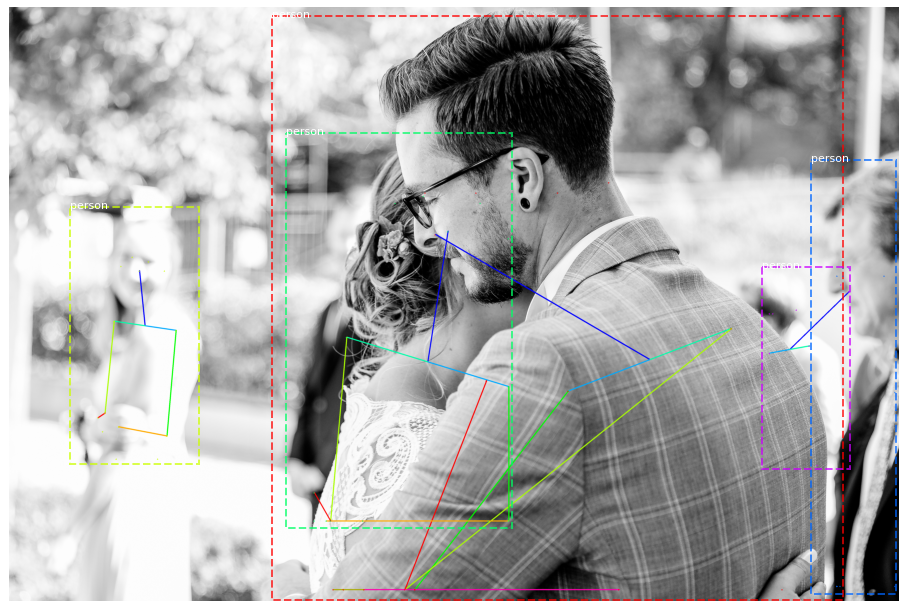

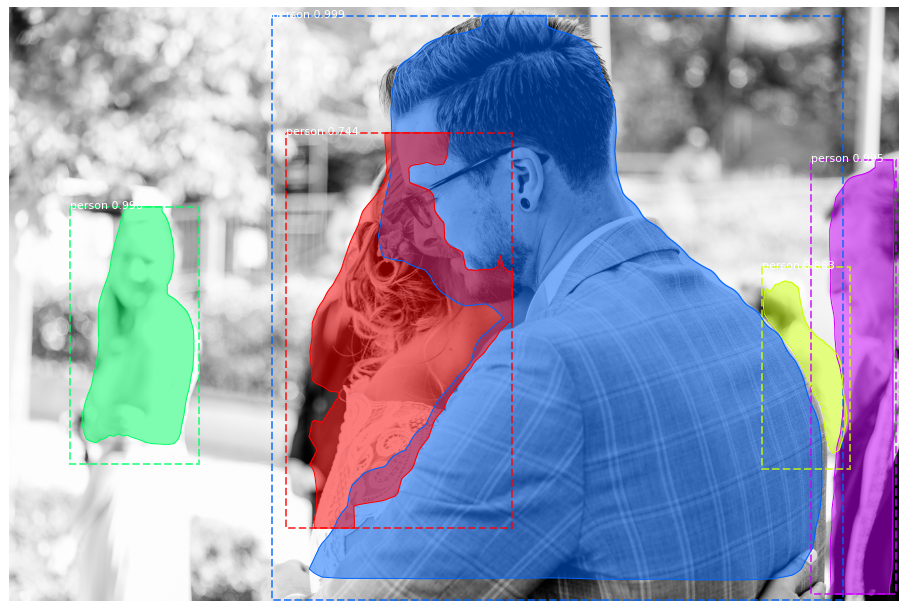

In [3]:
import cv2
# COCO Class names
#For human pose task We just use "BG" and "person"
class_names = ['BG', 'person']
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
# image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = cv2.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
#BGR->RGB
image = image[:,:,::-1]

# Run detection
results = model.detect_keypoint([image], verbose=1)
r = results[0] # for one image

log("rois",r['rois'])
log("keypoints",r['keypoints'])
log("class_ids",r['class_ids'])
log("keypoints",r['keypoints'])
log("masks",r['masks'])
log("scores",r['scores'])

visualize.display_keypoints(image,r['rois'],r['keypoints'],r['class_ids'],class_names,skeleton = inference_config.LIMBS)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])